<a href="https://colab.research.google.com/github/OjasCodes/LearnML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [2]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#divide the dataset into indedpendent and dependent features

 #iloc - index location

X= dataset.iloc[:,3:13] #independent features  #all the rows with column range from index 3 to 12
Y = dataset.iloc[:,13]  #dependent features    #all the rows with column with index 13 only

In [5]:
#ferature engeneering
geography = pd.get_dummies(X['Geography'], drop_first=True)   #Converts categorical columns into numerical (binary) format
gender = pd.get_dummies(X['Gender'], drop_first=True)
#drop_first: If true, drops the first category(france) to avoid the dummy variable trap


In [6]:
#dropping these variables to later concatenate in binary form

X = X.drop(['Geography','Gender'], axis = 1)  #Drops specified rows or columns from X
                                          #axis=0 : drop rows  ; axis=1 : drop column



In [7]:
#concatenate these variables with dataframe
X = pd.concat([X,geography,gender],axis=1)

In [8]:
#splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


#X_train, X_test: Feature sets for training and testing.

#Y_train, Y_test: Target variable sets for training and testing.

#test_size=0.2 → 20% of the data is allocated to the test set, while 80% goes to the training set.

#random_state=0 → Ensures reproducibility, meaning the split remains the same every time you run the code.

In [9]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



fit_transform => Computes the mean and standard deviation from X_train (using .fit()) & Applies standardization to X_train (using .transform())



Why do we use fit_transform(X_train)????

Since the model learns patterns from X_train, we need to calculate scaling parameters (mean & std) from the training data.



What Happens if We Use fit_transform(X_test)?
1. The test data will get a new mean & standard deviation, different from training data.
2. The model will be tested on differently scaled data, making evaluation invalid.


So , to prevent data leakage and ensuring consistent scaling we use tranform in X_test

In [10]:
X_train.shape

(8000, 11)

In [11]:
#Now lets create the ANN
from tensorflow.keras.models import Sequential  #Helps us create a step-by-step neural network
from tensorflow.keras.layers import Dense    #Adds a layer where every neuron connects to every other neuron
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU  #Activation Functions
from tensorflow.keras.layers import Dropout  #Randomly turns off some neurons during training to prevent overfitting

#eg - dropout ratio is 0.3 => 30% neurons in current layer will get randomly deactivated

In [12]:
#initializing the ANN
classifier = Sequential()

In [13]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))   #in X_train we have 11 inputs , so we will 11 nodes in input layer

In [32]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [15]:
#adding the second hidden layer
classifier.add(Dense(units=5,activation='relu'))

In [16]:
#adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [19]:
#training the entire neural network

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
#by default adam uses learning rate of 0.01

In [18]:
#but if you want to provide your own learning rate
import tensorflow as tf
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [21]:
#early stopping - when the accuracy of model is not increasing , automatically the training of the model will stop
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:

model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks = early_stopping)

#validation_split=0.33 => it means 33% of your training data will be used for validation, while 67% will be used for training

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7869 - loss: 0.5490 - val_accuracy: 0.7955 - val_loss: 0.4500
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7981 - loss: 0.4336 - val_accuracy: 0.7955 - val_loss: 0.4277
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7960 - loss: 0.4177 - val_accuracy: 0.7955 - val_loss: 0.4166
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7885 - loss: 0.4196 - val_accuracy: 0.7955 - val_loss: 0.4057
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8098 - loss: 0.3905 - val_accuracy: 0.8167 - val_loss: 0.3972
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8364 - loss: 0.3748 - val_accuracy: 0.8254 - val_loss: 0.3899
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8541 - loss: 0.3648 - val_accuracy: 0.8379 - val_loss: 0.3849
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8563 - loss: 0.3658 - val_accu

In [23]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

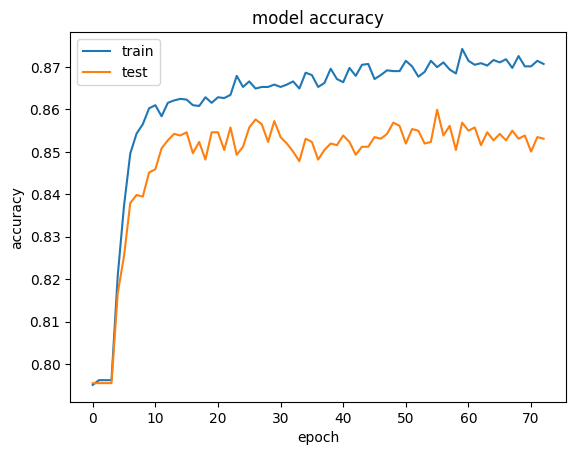

In [25]:
#plotting summarize history of accuracy


plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

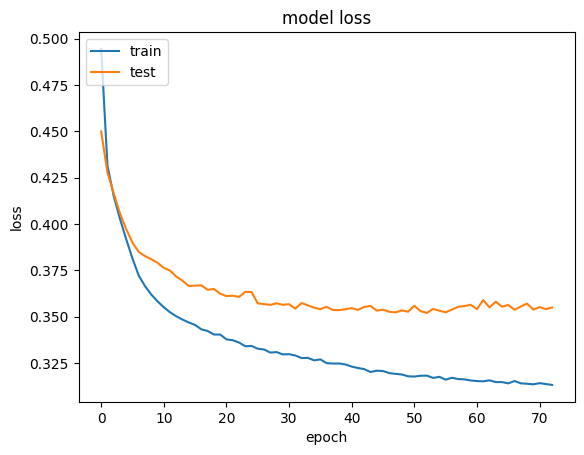

In [26]:
#plotting summarize history of loss


plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
#making predictions & evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [29]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1496,   99],
       [ 185,  220]])

In [30]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,y_pred)
score

0.858

In [31]:
#get the weights
classifier.get_weights()

[array([[-0.20313692, -0.44300023, -0.0650836 ,  0.26456407,  0.29450867,
          0.30350286, -0.04046305, -0.04727335,  0.2026887 , -0.00685481,
         -0.04011176],
        [ 0.00186415, -0.2824814 ,  1.1122873 , -0.3132463 , -0.21843989,
         -0.39301002,  0.13206491,  0.06227248, -0.7152592 ,  0.204395  ,
         -0.4878999 ],
        [-0.01403654,  0.20424472, -0.1751425 , -0.37385738,  0.16512512,
         -0.26724198,  0.0203135 ,  0.06088762,  0.11017169,  0.02566956,
         -0.34708208],
        [-0.13385591, -0.01692286, -0.03232026, -0.3914081 , -0.30960724,
         -0.22778334, -0.28675565, -0.6518304 , -0.7450481 ,  0.08793584,
          0.8960171 ],
        [ 0.54347944, -0.22633702, -0.23272839, -0.59871835, -0.3066599 ,
         -0.4081071 ,  0.04333179, -1.3626541 ,  0.01982196,  0.97812814,
         -0.4346189 ],
        [-0.23103979,  0.399887  ,  0.06403801, -0.29118407, -0.335661  ,
          0.55643976, -0.23756821, -0.03698011, -0.47804832, -0.1558889